### K-means Clustering 예제
1. 붓꽃 데이터 분류
2. 손글씨 이미지 분류

#### 1. 붓꽃 데이터 분류

- 독립변수 : feature
    - sepal_length : 꽃받침 길이
    - sepal_width : 꽃받침 넓이
    - petal_length : 꽃잎 길이
    - petal_width : 꽃잎 넓이
- 종속변수 : target
    - species : 품종
        - setosa
        - versicolor
        - virginica

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.feature_names)
columns = ["_".join(column.split(" ")[:2]) for column in iris.feature_names]
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [5]:
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df["species"] = iris.target
iris_df.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
iris_df.species.unique()

array([0, 1, 2])

- color map : `https://matplotlib.org/tutorials/colors/colormaps.html`

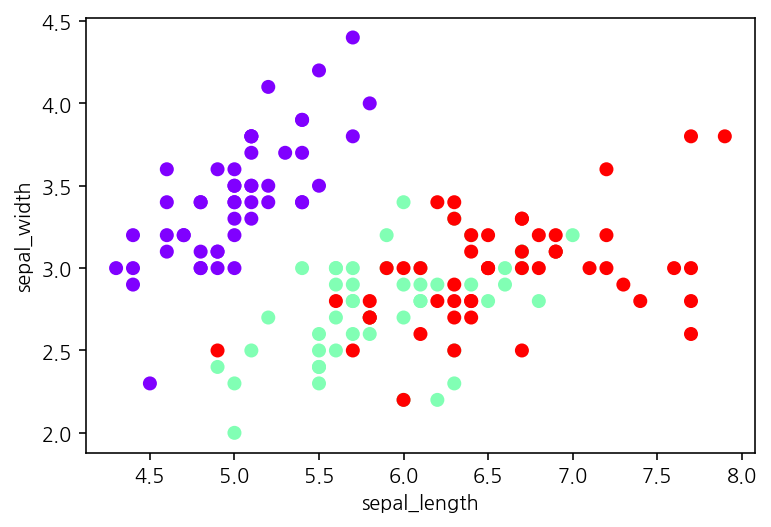

In [7]:
plt.scatter(iris_df["sepal_length"], iris_df["sepal_width"], c=iris_df["species"], cmap="rainbow")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [8]:
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [9]:
model = KMeans(n_clusters=3, random_state=0).fit(iris_df[columns[:2]])

In [10]:
# 중앙값
model.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

In [11]:
model.cluster_centers_[:,0], model.cluster_centers_[:,1]

(array([5.77358491, 5.006     , 6.81276596]),
 array([2.69245283, 3.428     , 3.07446809]))

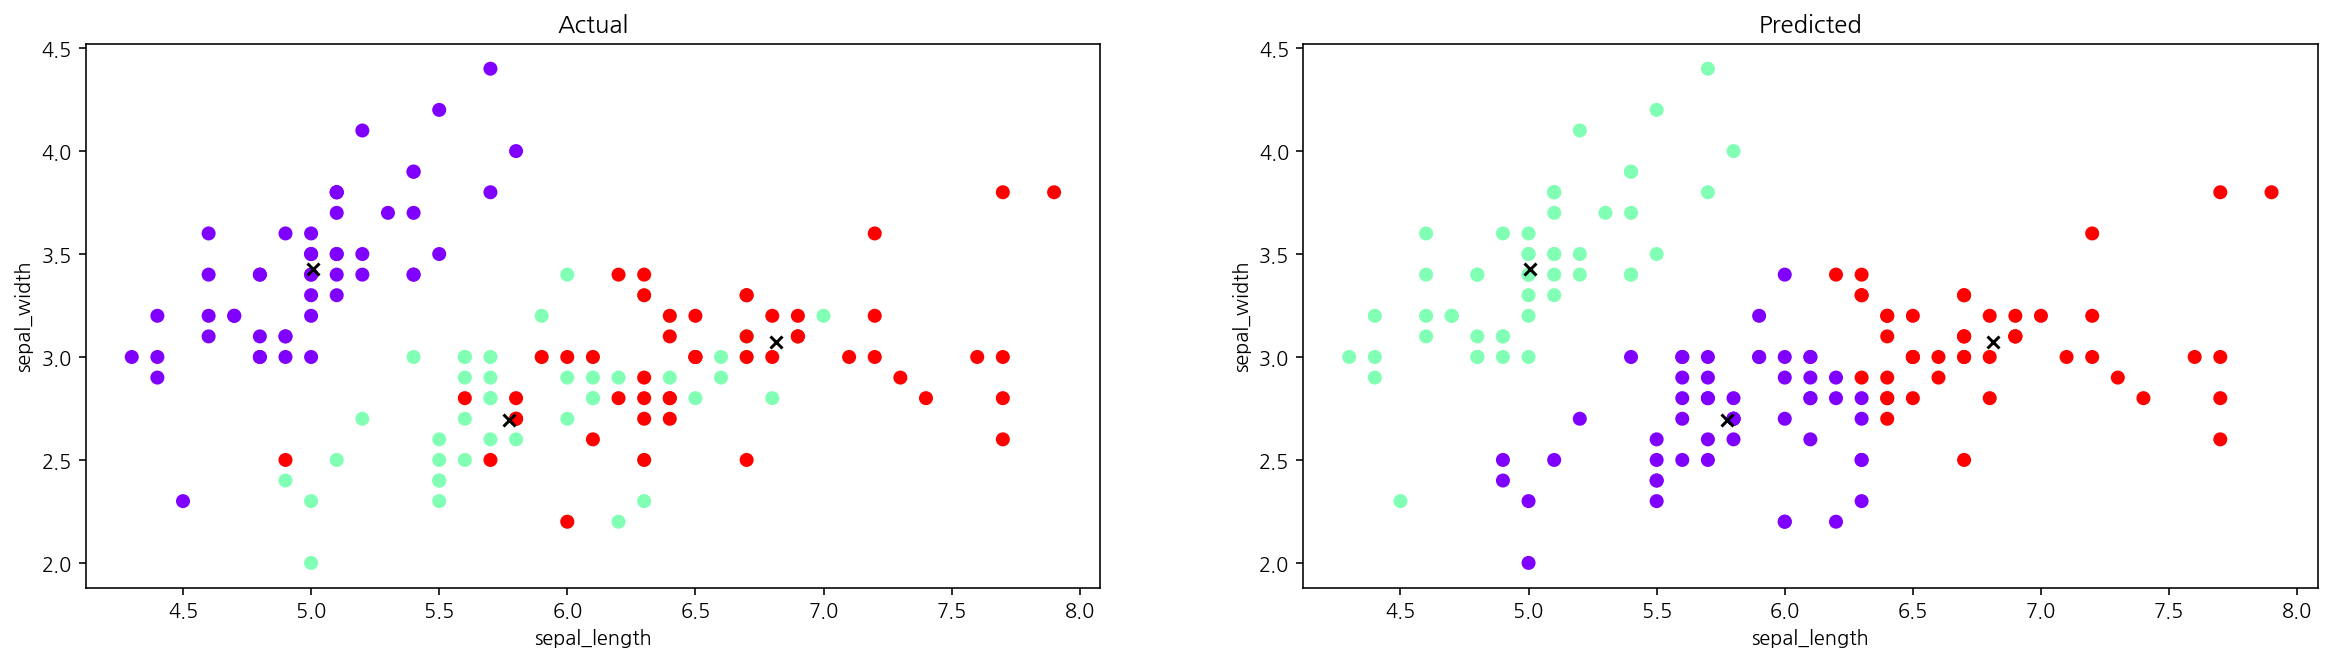

In [12]:
plt.figure(figsize=(20, 5))

# 실제 데이터 그래프
plt.subplot(121)
plt.scatter(iris_df["sepal_length"], iris_df["sepal_width"], c=iris_df["species"], cmap="rainbow")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="black", marker="x")
plt.title("Actual")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

# 예측 데이터 그래프
plt.subplot(122)
plt.scatter(iris_df["sepal_length"], iris_df["sepal_width"], c=model.labels_, cmap="rainbow")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="black", marker="x")
plt.title("Predicted")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

#### 2. 손글씨 이미지 분류

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()

In [14]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [15]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

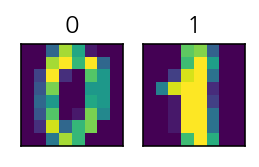

In [16]:
# 숫자 이미지 출력
plt.figure(figsize=(2, 2))

# 첫번째 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(digits.images[0])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title(0)

# 두번째 이미지 출력
plt.subplot(1, 2, 2)
plt.imshow(digits.images[1])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title(1)

plt.show()

In [17]:
# 모델 학습
model = KMeans(init="random", n_clusters=10, random_state=0)
model.fit(digits.data)

KMeans(init='random', n_clusters=10, random_state=0)

In [18]:
# 모델로 실제 데이터 예측
pred = model.predict(digits.data)
pred

array([7, 1, 1, ..., 1, 8, 8])

In [19]:
len(digits.images), len(pred)

(1797, 1797)

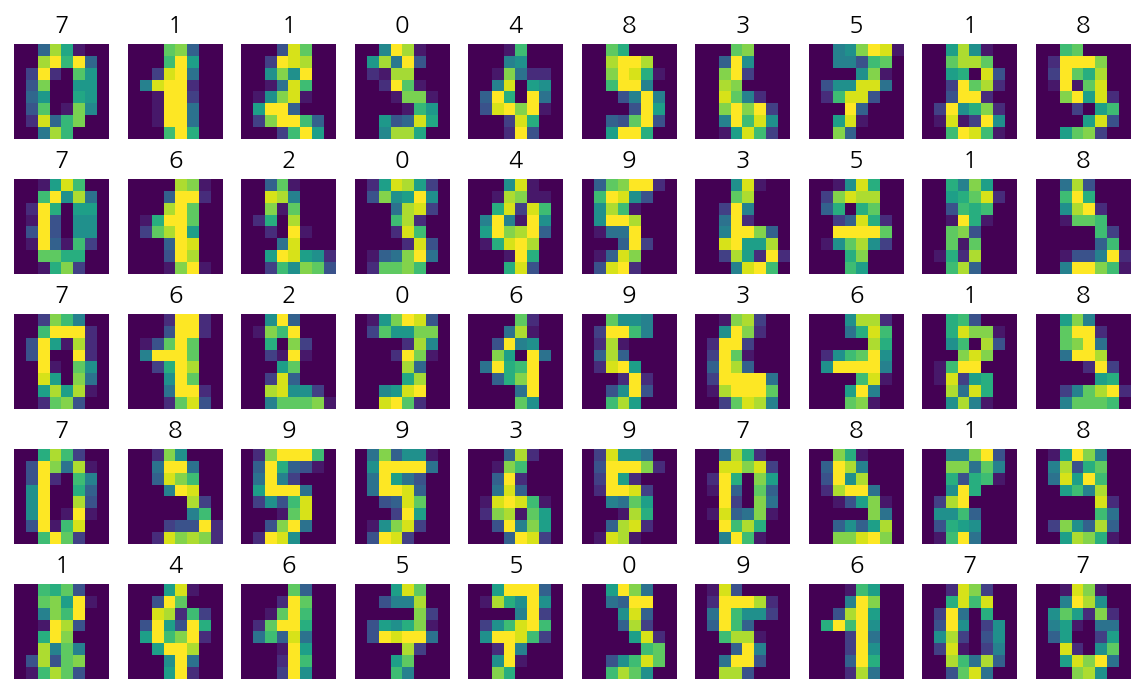

In [20]:
f = plt.figure(figsize=(10, 6))

for idx in range(0, 50):
    plt.subplot(5, 10, idx + 1)
    plt.imshow(digits.images[idx])
    plt.title(pred[idx])
    plt.grid(False)
    plt.axis("off")

plt.show()

최적의 k 값 찾기
- `https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html`
- WSS : inertia_
    - 가장 가까운 군집 중심까지의 표본의 제곱 거리의 합.

In [ ]:
distortions = []
k = range(5, 15)

for n in k:
    model = KMeans(init="k-means++", n_clusters=n, random_state=0)
    model.fit(digits.data)
    distortions.append(model.inertia_)

In [ ]:
# 실제로는 10이 맞지만 wss 값으로는 9가 가장 좋은것으로 나옴
# 이미지 데이터의 경우에는 데이터의 차원이 높아서 정확도가 떨어짐
plt.plot(k, distortions, "bs-") 
plt.show()

In [ ]:
!pip install yellowbrick

In [ ]:
# yellowbrick 패키지 사용 -> feature의 수가 많아질수록 k 값을 찾는것이 정확하지 않습니다.
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1, 20))

visualizer.fit(digits.data)
visualizer.show()
plt.show()

- ARI
    - Adjusted Rand Index
    - 0 ~ 1사이의 값을 갖고 1이 가장 좋은 성능을 의미
- AMI
    - Adjusted Mutual Information : Adjusted Mutual Information between two clusterings
    - 확률변수간 상호의존성을 측정한 값
- ARI와 AMI는 종속변수가 있어야 구할수 있음

In [ ]:
# ARI, AMI값은 라벨 데이터가 있기때문에 확인이 가능 
# -> 높은 값을 선택하면 좋은 K값을 선택할수 있음
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

ari_datas, ami_datas, silhouette_datas = [], [], []

n_datas = range(5, 15) 

for n in n_datas:

    model = KMeans(n_clusters=n, random_state=0)
    model.fit(digits.data)
    
    # 예측 데이터
    pred = model.predict(digits.data)
    
    # 평가 지표 데이터 저장
    # ari_data = adjusted_rand_score(digits.target, pred) # 실제 데이터가 있어야 평가지표 구할수 있음
    # ami_data = adjusted_mutual_info_score(digits.target, pred) # 실제 데이터가 있어야 평가지표 구할수 있음
    silhouette_data = silhouette_score(digits.data, pred) # 실제 데이터가 없어도 평가지표 구할수 있음

    # 데이터 저장
    # ari_datas.append(ari_data)    
    # ami_datas.append(ami_data)
    silhouette_datas.append(silhouette_data)
    
    # 데이터 출력
    # print("n : {},\t ARI: {},\tAMI : {},\tSilhouette Score: {}".format(n, ari_data, ami_data, silhouette_data))
    print("n : {},\t Silhouette Score: {}".format(n, silhouette_data))
    
# 그래프 출력

# plt.plot(n_datas, ari_datas, label="ARI")
# plt.plot(n_datas, ami_datas, label="AMI")
plt.plot(n_datas, silhouette_datas, label="Silhouette")

plt.xticks(n_datas)
plt.legend()

plt.show()